# Data description
Each observation is a 30m x 30m patch
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Read in data
import pandas
train_df = pandas.read_csv('./data/train.csv')
print("Shape is:", train_df.shape)
print("Columns are:", train_df.columns)

Shape is: (15120, 56)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', '

# Numeric Variables

### After plotting all numeric variables, it seems the best separation comes from using Elevation and Horizontal_Distance_To_Hydrology or Horizontal_Distance_To_Roadways:

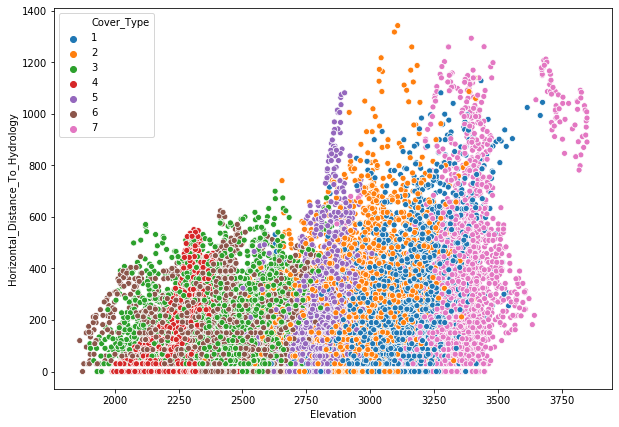

In [33]:
train_df['Cover_Type'] = train_df['Cover_Type'].astype('category')


plt.figure(figsize=(10,7))
sns.scatterplot(data=train_df, x="Elevation", y="Horizontal_Distance_To_Hydrology",
                hue="Cover_Type")

Cover types 7,1,2,5 are more easily distinguishable, but cover types 6,3,4 are harder, just based on these 2 variables.

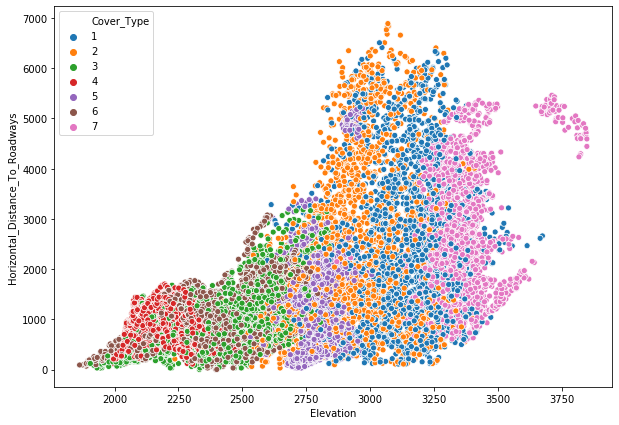

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train_df, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type")

Looks like we will definitely want to include Elevation and Horizontal_Distance_To_Roadways, as these features separate the cover types nicely

# Categorical Variables

### Wilderness Areas 

In [50]:
#undo 1 hot encoded Wilderness Areas
train_df["Wilderness_Area"] = train_df.loc[:,["Wilderness_Area1", "Wilderness_Area2",
                                            "Wilderness_Area3", "Wilderness_Area4"]].idxmax(axis=1)

In [51]:
train_df["Wilderness_Area"]

0        Wilderness_Area1
1        Wilderness_Area1
2        Wilderness_Area1
3        Wilderness_Area1
4        Wilderness_Area1
               ...       
15115    Wilderness_Area3
15116    Wilderness_Area3
15117    Wilderness_Area3
15118    Wilderness_Area3
15119    Wilderness_Area3
Name: Wilderness_Area, Length: 15120, dtype: object

<Figure size 1080x720 with 0 Axes>

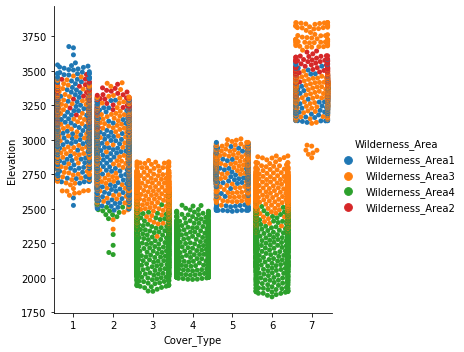

In [74]:
plt.figure(figsize=(15,10))
sns.catplot(x="Cover_Type", y="Elevation", hue="Wilderness_Area", kind="swarm", data=train_df)

Potentially helpful information given wilderness areas info. Again, cover types 3 and 6 are espeically hard to distinghish

### Soil Types

In [56]:
#undo 1 hot encoded soil types
train_df["Soil_Type"] = train_df.loc[:,['Soil_Type1', 'Soil_Type2', 
        'Soil_Type3','Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].idxmax(axis=1)

In [57]:
train_df["Soil_Type"]

0        Soil_Type29
1        Soil_Type29
2        Soil_Type12
3        Soil_Type30
4        Soil_Type29
            ...     
15115     Soil_Type4
15116     Soil_Type4
15117     Soil_Type4
15118     Soil_Type4
15119     Soil_Type2
Name: Soil_Type, Length: 15120, dtype: object

<Figure size 720x1080 with 0 Axes>

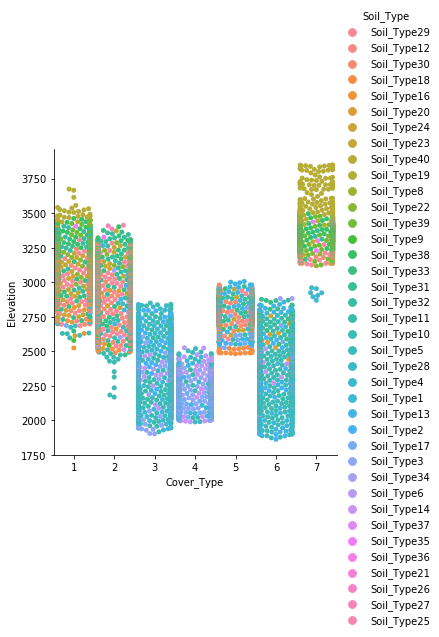

In [58]:
plt.figure(figsize=(10,15))
sns.catplot(x="Cover_Type", y="Elevation", hue="Soil_Type", kind="swarm", data=train_df)

Not sure how useful soil type info is yet